#Introduction to RDKit

In [2]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 5.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


RDKit can convert SMILES string to a molecule

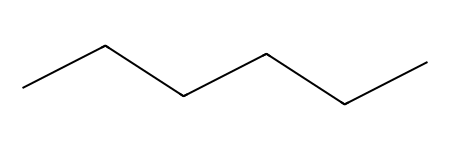

In [7]:
mol = Chem.MolFromSmiles('CCCCCC')
mol

In [8]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCCCC'

In [9]:
mw = Descriptors.MolWt(mol)
mw

86.178

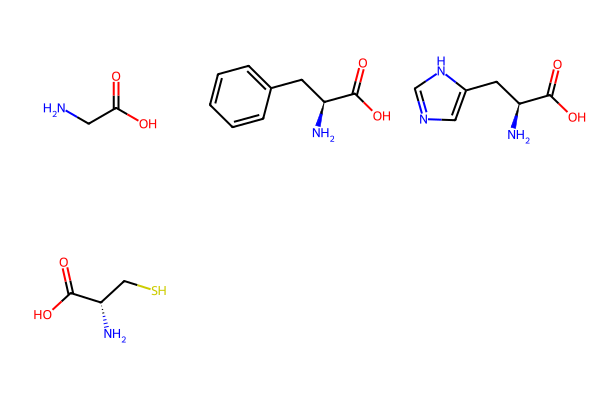

In [10]:
smiles_list = ['C(C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)N ', 'C1=C(NC=N1)C[C@@H](C(=O)O)N', 'C([C@@H](C(=O)O)N)S']

mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list)
img

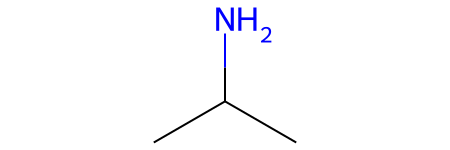

In [11]:
pattern = Chem.MolFromSmiles('CC(N)C')
pattern

In [22]:
# pattern = Chem.MolFromSmiles('S')
# pattern = Chem.MolFromSmiles('C(=O)O')
pattern = Chem.MolFromSmiles('CC(N)C')

# Smarts is to use a notation which tell whethter or not a molecule has a ring.
# pattern = Chem.MolFromSmiles('[r5]')

for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
True
True
True


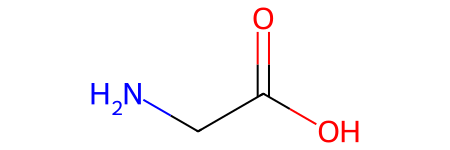

In [23]:
# Fingerprint

glycine = mol_list[0]
glycine

In [32]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
fp_arr =np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fp_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

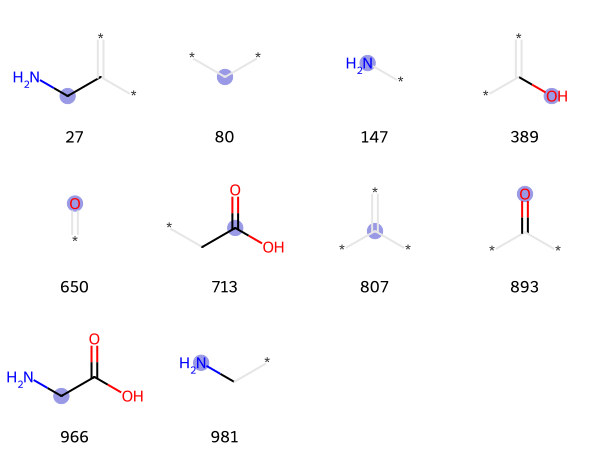

In [34]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

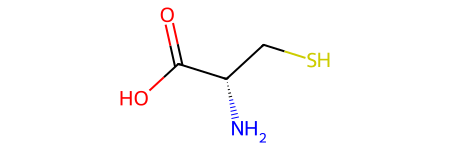

In [35]:
cys = mol_list[3]
cys

In [36]:
bi2 = {}
fp2 = AllChem.GetMorganFingerprintAsBitVect(cys, 2, nBits=1024, bitInfo=bi2)
fp_arr2 =np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr2)
fp_arr2

array([0., 1., 0., ..., 0., 0., 0.])

In [41]:
np.nonzero(fp_arr2)

(array([  1,  48,  80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820,
        825, 893, 902]),)

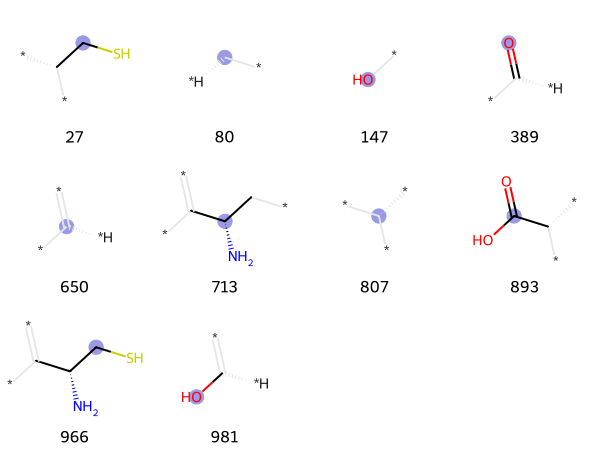

In [42]:
prints2 = [(cys, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints2, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

In [49]:
print('cys', list(fp2.GetOnBits()))
print('gly', list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
print('comon', common)

combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print('combined', combined)

print('simmilarity value',len(common)/len(combined))

print('Tanimoto', DataStructs.TanimotoSimilarity(fp,fp2))

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
comon {389, 807, 650, 80, 147, 893}
combined {1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
simmilarity value 0.3
Tanimoto 0.3
